<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Computer Vision: Plant Seedlings Classification</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>

# Description

## Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## Data Description

This dataset contains images of unique plants belonging to 12 different species.

- The data file names are:
  - images.npy
  - Label.csv
- Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
- The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


# Import Libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model, and Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, classification_report                              # Importing confusion_matrix to plot the confusion matrix and classification report to evaluate models
from sklearn.preprocessing import LabelBinarizer                                                 # Importing LabelBinarizer to encode the target variable
from sklearn.utils import class_weight
from tensorflow.keras import backend
import random
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score
)

from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Support Functions

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
          ax.axis('off')
  plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, name):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_p = model.predict(predictors)
    pred = np.argmax(pred_p,axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Model": name, "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


# Reading the dataset

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/8. Introduction to Computer Vision/Project 8: Computer Vision: Plant Seedlings Classification/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/8. Introduction to Computer Vision/Project 8: Computer Vision: Plant Seedlings Classification/Labels.csv')

# Overview of the dataset


Let's print the shape of the images and labels 

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


**Insights**
- There are 4,750 RGB images of size 128 x 128 (with 3 channels each)
- We have 4,750 labels (1 for each image)

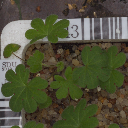

In [ ]:
cv2_imshow(images[3])

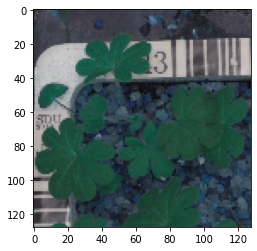

In [ ]:
plt.imshow(images[3])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

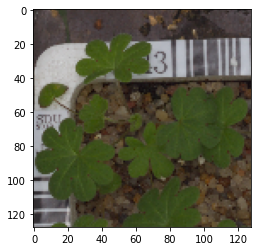

In [ ]:
plt.imshow(images[3])

Now we can see that matplotlib interprets and shows the right colors

# Exploratory Data Analysis

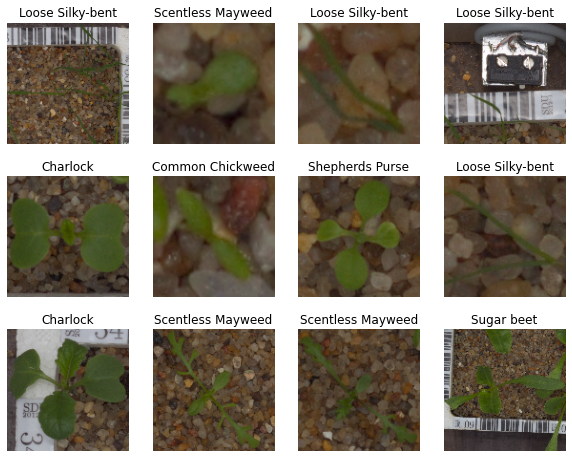

In [ ]:
plot_images(images,labels)

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

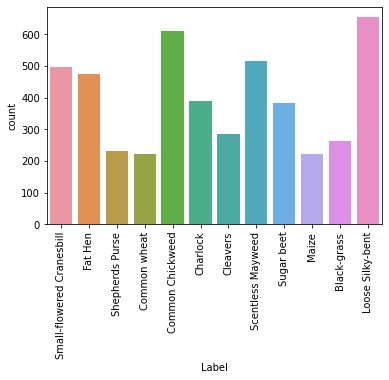

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

In [ ]:
labels.Label.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

**Insights**
- As we can see the data is imbalanced
  - 3 classes around 200
  - 2 classes around 300
  - 2 classes around 400
  - 3 classes around 500
  - 2 classes around 600

In [ ]:
labels.Label.value_counts(normalize=True)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64

**Insights**
- Range of participation goes from 4.6 to 13.8%
- Loose Silky-bent class has 3 times more images than Maize class

In [ ]:
for x, i in enumerate(np.unique(labels)):
  print(f'{x+1}: {i}')

1: Black-grass
2: Charlock
3: Cleavers
4: Common Chickweed
5: Common wheat
6: Fat Hen
7: Loose Silky-bent
8: Maize
9: Scentless Mayweed
10: Shepherds Purse
11: Small-flowered Cranesbill
12: Sugar beet


In [ ]:
# Show first 8 images of every class
for current_label in np.unique(labels): #iterate in every different label
  rows = 2
  cols = 4
  fig = plt.figure(figsize=(10, 5.5)) # create a figure of 2x4 for every label
  curr_indexes = [i for i, e in enumerate(labels["Label"].values.tolist()) if e == current_label] #get indexes of this particular label
  k = 0
  for i in range(cols):
    for j in range(rows):
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)  # add a subplot for 2 rows and 4 cols                    
      ax.imshow(images[curr_indexes[k]])                  #show the image                    
      ax.set_title(current_label)                         # set title for this particular label
      ax.axis('off')                       
      k += 1                                              # we are showing the first 8 images of every label
  plt.show


Output hidden; open in https://colab.research.google.com to view.

**Insights**
- We can see that all images of all classes are aerial photos
- All of them have the same background
- Not all of them have the same quality, some are very clear and some are quite blurred


### Key observations EDA

- There is imbalance in the data
  - 3 classes around 200
  - 2 classes around 300
  - 2 classes around 400
  - 3 classes around 500
  - 2 classes around 600 
  - Range of participation goes from 4.6 to 13.8%
  - Loose Silky-bent class has 3 times more images than Maize class
- Of theimages we see:
  - We can see that all images of all classes are aerial photos
  - All of them have the same background
  - Not all of them have the same quality, some are very clear and some are quite blurred


# Data pre processing

## Resizing the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

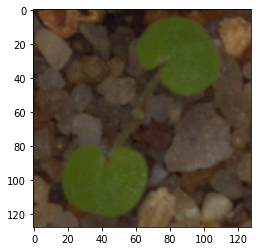

In [ ]:
plt.imshow(images[5])

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

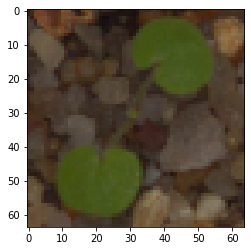

In [ ]:
plt.imshow(images_decreased[5])

## Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

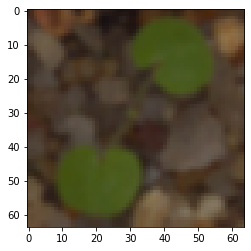

In [ ]:
plt.imshow(images_gb[5])

We will not use the images with gaussian blur filter since they do not look better than the reduced ones. A lot of detail is missing in the leaves

## Spliting data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)


In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3800, 64, 64, 3) (3800, 1)
(475, 64, 64, 3) (475, 1)
(475, 64, 64, 3) (475, 1)


We splited the data in 3:
- Train      (80%)
- Validation (10%)
- Test       (10%)

# Make data compatible

## Encoding target variable

In [ ]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Class weight

As we have imbalanced data we will optimize the class weights

In [ ]:
labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.797649034424853,
 1: 0.8333333333333334,
 2: 1.7117117117117118,
 3: 1.7890772128060264,
 4: 0.6475800954328562,
 5: 1.014957264957265,
 6: 1.3828238719068413,
 7: 0.7667473769168685,
 8: 1.0281385281385282,
 9: 1.7890772128060264,
 10: 1.507936507936508,
 11: 0.6054811982154238}

# Model 1

## Clearing session and reseting random seeds

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Defining model architecture

In [ ]:
# Intializing a sequential model
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Flatten())

model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(12, activation='softmax'))

opt=Adam()
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

## Training the model

We will train the model with:
- Normalized data 
- Encoded target variable
- Defined class_weight

In [ ]:
%%time

history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=60,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            class_weight=class_weights
)

Epoch 1/60
119/119 - 13s - loss: 2.8663 - accuracy: 0.1311 - val_loss: 2.3896 - val_accuracy: 0.1284 - 13s/epoch - 109ms/step
Epoch 2/60
119/119 - 1s - loss: 2.7424 - accuracy: 0.1518 - val_loss: 2.3067 - val_accuracy: 0.2042 - 851ms/epoch - 7ms/step
Epoch 3/60
119/119 - 1s - loss: 2.6427 - accuracy: 0.1724 - val_loss: 2.2748 - val_accuracy: 0.2442 - 945ms/epoch - 8ms/step
Epoch 4/60
119/119 - 1s - loss: 2.5682 - accuracy: 0.2245 - val_loss: 2.1937 - val_accuracy: 0.2800 - 921ms/epoch - 8ms/step
Epoch 5/60
119/119 - 1s - loss: 2.5031 - accuracy: 0.2345 - val_loss: 2.1334 - val_accuracy: 0.3368 - 1s/epoch - 9ms/step
Epoch 6/60
119/119 - 1s - loss: 2.4596 - accuracy: 0.2492 - val_loss: 2.0764 - val_accuracy: 0.3411 - 887ms/epoch - 7ms/step
Epoch 7/60
119/119 - 1s - loss: 2.3775 - accuracy: 0.2629 - val_loss: 2.0376 - val_accuracy: 0.3389 - 760ms/epoch - 6ms/step
Epoch 8/60
119/119 - 1s - loss: 2.3111 - accuracy: 0.2724 - val_loss: 2.0109 - val_accuracy: 0.3558 - 794ms/epoch - 7ms/step
Ep

## Model evaluation

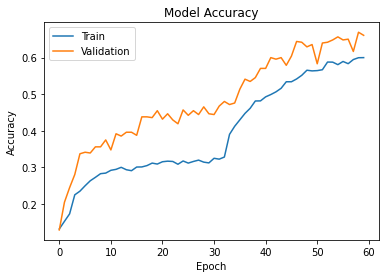

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluating the model on test data

In [ ]:
model1_score_test = model_performance_classification_sklearn(model1, X_test_normalized, np.argmax(y_test_encoded, axis=1), 'Model 1 - TEST')
model1_score_test

15/15 [==============================] - 0s 4ms/step


,Model,Accuracy,Recall,Precision,F1
0,Model 1 - TEST,0.652632,0.652632,0.639542,0.60983


In [ ]:
model_comparison_test = model1_score_test

In [ ]:
y_test_pred_1 = model1.predict(X_test_normalized)
print(classification_report((np.argmax(y_test_encoded, axis=1)), np.argmax(y_test_pred_1,axis=1)))

15/15 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.85      0.87      0.86        39
           2       0.65      0.90      0.75        29
           3       0.62      0.92      0.74        61
           4       0.75      0.27      0.40        22
           5       0.56      0.52      0.54        48
           6       0.58      0.92      0.71        65
           7       1.00      0.09      0.17        22
           8       0.55      0.63      0.59        51
           9       0.38      0.22      0.28        23
          10       0.90      0.88      0.89        49
          11       0.78      0.54      0.64        39

    accuracy                           0.65       475
   macro avg       0.63      0.56      0.55       475
weighted avg       0.64      0.65      0.61       475



## Generating the predictions using test data

In [ ]:
y_test_pred_1

array([[2.1297690e-02, 7.4433744e-02, 1.4243291e-01, ..., 1.3135129e-01,
        4.1761100e-02, 4.9565494e-02],
       [1.5762156e-01, 6.6408008e-16, 7.1329292e-12, ..., 1.0927529e-11,
        3.7409270e-10, 1.3871827e-04],
       [2.7103297e-02, 8.2100108e-03, 2.2882020e-02, ..., 4.9204780e-03,
        1.2590466e-02, 4.4806975e-01],
       ...,
       [1.7282125e-01, 1.1891490e-14, 8.3037209e-11, ..., 6.2119920e-11,
        1.6519411e-09, 3.3503727e-04],
       [1.1135749e-16, 4.5519546e-06, 1.6890507e-17, ..., 2.4184961e-02,
        2.2521232e-05, 1.1214142e-03],
       [2.1734583e-04, 1.3917975e-01, 7.9029912e-01, ..., 2.5535287e-06,
        1.7697632e-02, 9.6775973e-03]], dtype=float32)

## Plotting the Confusion Matrix

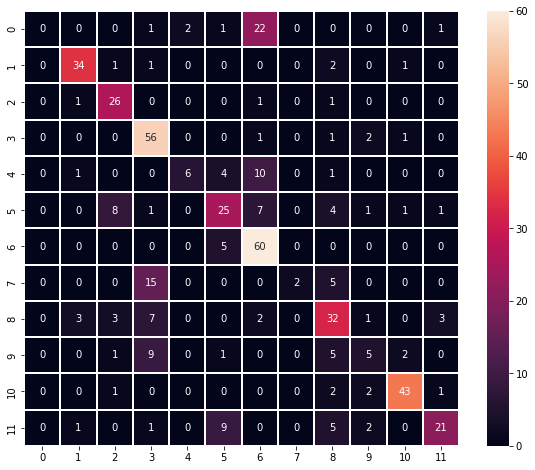

In [ ]:
y_pred_arg_1=np.argmax(y_test_pred_1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Key observations model 1

- We got the following accuracy:
  - Training data: 0.6000 
  - Validation data: 0.6611
  - Testing data: 0.6526
- We can conclude that we are not overfitting
- The accuracy is low, we need to improove
- We can see a lot of high numbers out of the diagonal in the confusion matrix, indicating that we are not predicting correctly

# Model 2

We will try to improve doing the following:
- Augmenting the data
- Adding a BatchNormalization Layer

## Clearing session and reseting random seeds

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Data Augmentation

We will use a wide variety of augmentation filters:
- Horizontal flip
- Vertical Flip
- Height Shift
- Width shift
- Rotation 
- Zoom

In [ ]:
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

## Defining model architecture

In [ ]:
# Intializing a sequential model
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(12, activation='softmax'))

opt=Adam()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

## Training the model

We will train the model with:
- Normalized data 
- Encoded target variable
- Defined class_weight

In [ ]:
%%time

# Epochs
epochs = 60
# Batch size
batch_size = 64

history_2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    class_weight=class_weights,
                    verbose=1)

Epoch 1/60
59/59 [==============================] - 9s 117ms/step - loss: 2.6005 - accuracy: 0.2294 - val_loss: 2.3819 - val_accuracy: 0.2842
Epoch 2/60
59/59 [==============================] - 5s 87ms/step - loss: 2.0457 - accuracy: 0.3531 - val_loss: 2.3200 - val_accuracy: 0.2842
Epoch 3/60
59/59 [==============================] - 7s 127ms/step - loss: 1.8442 - accuracy: 0.4085 - val_loss: 2.2041 - val_accuracy: 0.2126
Epoch 4/60
59/59 [==============================] - 5s 89ms/step - loss: 1.7747 - accuracy: 0.4248 - val_loss: 2.1253 - val_accuracy: 0.2337
Epoch 5/60
59/59 [==============================] - 8s 143ms/step - loss: 1.6342 - accuracy: 0.4585 - val_loss: 1.8893 - val_accuracy: 0.4042
Epoch 6/60
59/59 [==============================] - 6s 95ms/step - loss: 1.5625 - accuracy: 0.4807 - val_loss: 1.8214 - val_accuracy: 0.5537
Epoch 7/60
59/59 [==============================] - 5s 88ms/step - loss: 1.5270 - accuracy: 0.4997 - val_loss: 1.6605 - val_accuracy: 0.4989
Epoch 8/60

## Model evaluation

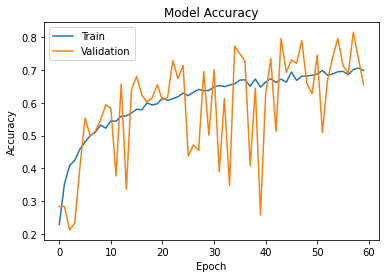

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluating the model on test data

In [ ]:
model2_score_test = model_performance_classification_sklearn(model2, X_test_normalized, np.argmax(y_test_encoded, axis=1), 'Model 2 - TEST')
model2_score_test

15/15 [==============================] - 0s 3ms/step


,Model,Accuracy,Recall,Precision,F1
0,Model 2 - TEST,0.696842,0.696842,0.663622,0.666349


In [ ]:
model_comparison_test = pd.concat([model_comparison_test, model2_score_test], axis=0)

In [ ]:
y_test_pred_2 = model2.predict(X_test_normalized)
print(classification_report((np.argmax(y_test_encoded, axis=1)), np.argmax(y_test_pred_2,axis=1)))

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.60      0.90      0.72        39
           2       0.56      0.66      0.60        29
           3       0.98      0.80      0.88        61
           4       0.00      0.00      0.00        22
           5       0.80      0.73      0.76        48
           6       0.73      0.75      0.74        65
           7       0.58      1.00      0.73        22
           8       0.84      0.63      0.72        51
           9       0.76      0.57      0.65        23
          10       0.80      0.92      0.86        49
          11       0.44      0.82      0.58        39

    accuracy                           0.70       475
   macro avg       0.59      0.65      0.60       475
weighted avg       0.66      0.70      0.67       475



## Generating the predictions using test data

In [ ]:
y_test_pred_2

array([[1.4822235e-04, 8.0307685e-02, 2.6691425e-01, ..., 1.1233629e-01,
        2.0757217e-02, 6.2236786e-02],
       [4.3476680e-03, 7.1987103e-08, 1.3235411e-06, ..., 1.3105612e-10,
        3.7541409e-05, 9.7524184e-01],
       [6.0493253e-06, 2.4895780e-04, 1.5564538e-03, ..., 1.7270411e-06,
        2.1321373e-06, 9.7557926e-01],
       ...,
       [2.0242929e-03, 3.4359488e-07, 7.0477063e-06, ..., 6.7371858e-11,
        1.0672188e-05, 9.8493201e-01],
       [1.9989102e-07, 2.3289235e-06, 1.8703869e-07, ..., 2.9029140e-01,
        5.9395570e-01, 4.5600851e-04],
       [2.0222174e-17, 9.8900837e-01, 9.6440967e-03, ..., 1.5418418e-05,
        1.1840838e-03, 5.0701634e-05]], dtype=float32)

## Plotting the Confusion Matrix

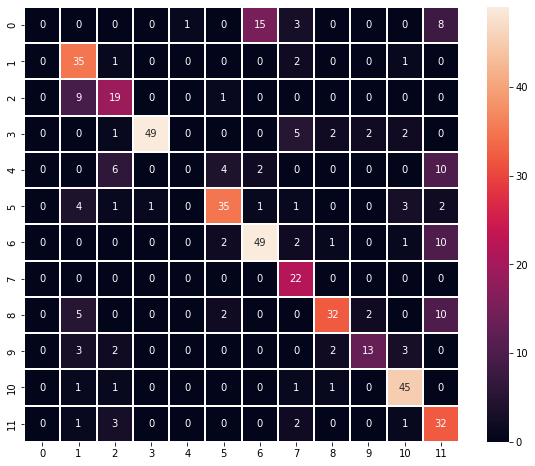

In [ ]:
y_pred_arg_2=np.argmax(y_test_pred_2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Key observations model 2

- We got the following accuracy:
  - Training data: 0.6986 
  - Validation data: 0.6547
  - Testing data: 0.6968
- We can conclude that we are not overfitting
- The accuracy has improved 
- We can see some high numbers out of the diagonal in the confusion matrix, indicating that we are not predicting correctly
- Can we do better than this, lets try something more

# Model 3

We will try to improve doing the following:
- Using transfer learning from VGG16

## Clearing session and reseting random seeds

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Data Augmentation

We will use a wide variety of augmentation filters:
- Horizontal flip
- Vertical Flip
- Height Shift
- Width shift
- Rotation 
- Zoom

In [ ]:
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

## Defining model architecture

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Intializing a sequential model
model3 = Sequential()

model3.add(vgg_model)

model3.add(Flatten())

model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(12, activation='softmax'))

opt=Adam()
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 16)                32784     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,747,676
Trainable params: 32,988
Non-trainable params: 14,714,688
_________________________________________________________________


## Training the model

We will train the model with:
- Normalized data 
- Encoded target variable
- Defined class_weight

In [ ]:
%%time

# Epochs
epochs = 60
# Batch size
batch_size = 64

history_3 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    class_weight=class_weights,
                    verbose=1)

Epoch 1/60
59/59 [==============================] - 11s 137ms/step - loss: 2.8675 - accuracy: 0.1253 - val_loss: 2.3473 - val_accuracy: 0.1811
Epoch 2/60
59/59 [==============================] - 6s 103ms/step - loss: 2.7036 - accuracy: 0.1935 - val_loss: 2.2561 - val_accuracy: 0.3200
Epoch 3/60
59/59 [==============================] - 6s 100ms/step - loss: 2.5960 - accuracy: 0.2318 - val_loss: 2.1961 - val_accuracy: 0.3158
Epoch 4/60
59/59 [==============================] - 9s 148ms/step - loss: 2.4961 - accuracy: 0.2473 - val_loss: 2.1354 - val_accuracy: 0.3284
Epoch 5/60
59/59 [==============================] - 6s 100ms/step - loss: 2.4168 - accuracy: 0.2548 - val_loss: 2.0698 - val_accuracy: 0.3347
Epoch 6/60
59/59 [==============================] - 7s 121ms/step - loss: 2.3598 - accuracy: 0.2562 - val_loss: 2.0199 - val_accuracy: 0.3347
Epoch 7/60
59/59 [==============================] - 7s 116ms/step - loss: 2.3439 - accuracy: 0.2719 - val_loss: 1.9814 - val_accuracy: 0.3642
Epoch

## Model evaluation

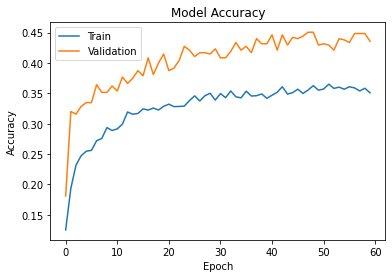

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluating the model on test data

In [ ]:
model3_score_test = model_performance_classification_sklearn(model3, X_test_normalized, np.argmax(y_test_encoded, axis=1), 'Model 3 - TEST')
model3_score_test

15/15 [==============================] - 0s 16ms/step


,Model,Accuracy,Recall,Precision,F1
0,Model 3 - TEST,0.433684,0.433684,0.315506,0.314175


In [ ]:
model_comparison_test = pd.concat([model_comparison_test, model3_score_test], axis=0)

In [ ]:
y_test_pred_3 = model3.predict(X_test_normalized)
print(classification_report((np.argmax(y_test_encoded, axis=1)), np.argmax(y_test_pred_3,axis=1)))

15/15 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        39
           2       0.45      0.72      0.55        29
           3       0.39      0.95      0.55        61
           4       0.00      0.00      0.00        22
           5       0.61      0.29      0.39        48
           6       0.45      1.00      0.62        65
           7       0.00      0.00      0.00        22
           8       0.69      0.18      0.28        51
           9       0.00      0.00      0.00        23
          10       0.40      0.80      0.53        49
          11       0.00      0.00      0.00        39

    accuracy                           0.43       475
   macro avg       0.25      0.33      0.24       475
weighted avg       0.32      0.43      0.31       475



## Generating the predictions using test data

In [ ]:
y_test_pred_3

array([[4.06903960e-03, 1.37348901e-02, 5.54534718e-02, ...,
        1.58352122e-01, 4.05597836e-02, 4.86379787e-02],
       [1.20191924e-01, 6.91574096e-05, 4.22280980e-03, ...,
        3.17285000e-03, 1.17076190e-04, 1.47281252e-02],
       [9.76389721e-02, 7.60996118e-05, 2.67360709e-03, ...,
        3.02363746e-02, 4.05440747e-04, 3.35421823e-02],
       ...,
       [4.35504094e-02, 2.57561812e-08, 2.00781033e-05, ...,
        1.34893246e-02, 1.57106911e-06, 1.12620285e-02],
       [6.67047561e-06, 2.22710948e-02, 3.49624306e-02, ...,
        1.51110291e-01, 1.81157768e-01, 4.62135710e-02],
       [7.83909636e-04, 2.23542228e-01, 3.29250783e-01, ...,
        4.36894968e-02, 1.45163178e-01, 1.83436703e-02]], dtype=float32)

## Plotting the Confusion Matrix

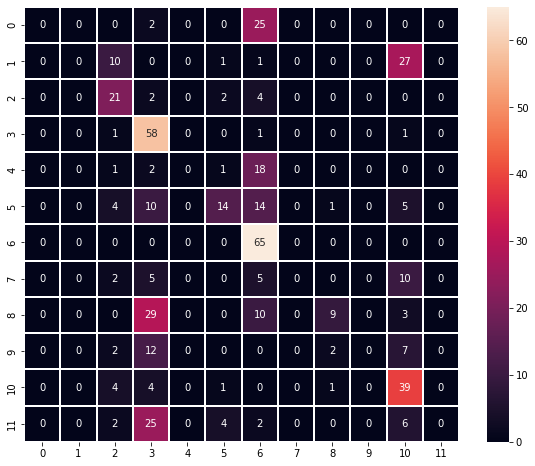

In [ ]:
y_pred_arg_3=np.argmax(y_test_pred_3,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Key observations model 3

- We got the following accuracy:
  - Training data: 0.3509 
  - Validation data: 0.4358
  - Testing data: 0.4337
- We can conclude that we are not overfitting
- The accuracy has plummeted
- We can see a lot of high numbers out of the diagonal in the confusion matrix, indicating that we are  predicting incorrectly
- Can we do better than this, lets try something else

# Model 4

We will try to improve doing the following:
- Using transfer learning from MobileNet
- We will not set layers to non trianable since what we want is to use the layer architecture and not the weights of MobileNet

## Clearing session and reseting random seeds

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Defining model architecture

In [ ]:
image_input=Input(shape=(64,64,3))
base_model = MobileNet(input_tensor=image_input,weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(12, activation='softmax')(x)
model4 = Model(inputs=base_model.input, outputs=predictions)

model4.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

model4.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 32, 32, 32)       128       
 ation)                                                    

## Training the model

We will train the model with:
- Normalized data 
- Encoded target variable
- Defined class_weight

In [ ]:
%%time

# train the model on the new data for a few epochs
batch_size = 32
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8 ** x)
earlystop = EarlyStopping(patience=5)
history_4 = model4.fit(
    X_train_normalized, y_train_encoded, batch_size=batch_size,
    epochs=200, 
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[annealer, earlystop]
)

Epoch 1/200
119/119 [==============================] - 20s 34ms/step - loss: 2.1726 - accuracy: 0.2984 - val_loss: 2.3804 - val_accuracy: 0.1789 - lr: 0.0010
Epoch 2/200
119/119 [==============================] - 3s 24ms/step - loss: 1.3248 - accuracy: 0.5695 - val_loss: 1.5710 - val_accuracy: 0.5432 - lr: 8.0000e-04
Epoch 3/200
119/119 [==============================] - 3s 24ms/step - loss: 0.9036 - accuracy: 0.7111 - val_loss: 1.2551 - val_accuracy: 0.6400 - lr: 6.4000e-04
Epoch 4/200
119/119 [==============================] - 3s 24ms/step - loss: 0.6495 - accuracy: 0.7924 - val_loss: 0.6073 - val_accuracy: 0.8232 - lr: 5.1200e-04
Epoch 5/200
119/119 [==============================] - 4s 31ms/step - loss: 0.4939 - accuracy: 0.8442 - val_loss: 0.5058 - val_accuracy: 0.8274 - lr: 4.0960e-04
Epoch 6/200
119/119 [==============================] - 3s 25ms/step - loss: 0.4085 - accuracy: 0.8676 - val_loss: 0.4419 - val_accuracy: 0.8547 - lr: 3.2768e-04
Epoch 7/200
119/119 [================

## Model evaluation

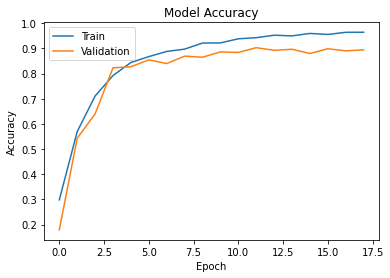

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluating the model on test data

In [ ]:
model4_score_test = model_performance_classification_sklearn(model4, X_test_normalized, np.argmax(y_test_encoded, axis=1), 'Model 4 - TEST')
model4_score_test

15/15 [==============================] - 1s 8ms/step


,Model,Accuracy,Recall,Precision,F1
0,Model 4 - TEST,0.894737,0.894737,0.899585,0.896558


In [ ]:
model_comparison_test = pd.concat([model_comparison_test, model4_score_test], axis=0)

In [ ]:
y_test_pred_4 = model4.predict(X_test_normalized)
print(classification_report((np.argmax(y_test_encoded, axis=1)), np.argmax(y_test_pred_4,axis=1)))

15/15 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        27
           1       0.95      0.97      0.96        39
           2       1.00      0.90      0.95        29
           3       0.98      0.95      0.97        61
           4       0.95      0.86      0.90        22
           5       0.92      0.94      0.93        48
           6       0.77      0.77      0.77        65
           7       1.00      1.00      1.00        22
           8       0.96      0.92      0.94        51
           9       0.85      0.96      0.90        23
          10       0.98      0.98      0.98        49
          11       0.97      1.00      0.99        39

    accuracy                           0.89       475
   macro avg       0.89      0.89      0.89       475
weighted avg       0.90      0.89      0.90       475



## Generating the predictions using test data

In [ ]:
y_test_pred_4

array([[5.1093770e-07, 3.3682213e-07, 3.8490700e-05, ..., 1.2117315e-03,
        1.4848233e-07, 9.5064001e-09],
       [1.0872441e-01, 2.0881779e-11, 1.2012173e-07, ..., 1.0249604e-08,
        1.4946604e-08, 8.6380162e-05],
       [2.3867412e-06, 1.4764081e-09, 1.3398444e-06, ..., 3.5925943e-05,
        3.6852946e-08, 1.6716164e-07],
       ...,
       [4.7014868e-01, 7.2329647e-12, 9.4956647e-08, ..., 5.1980042e-09,
        1.0660691e-08, 4.8217404e-05],
       [1.6557103e-11, 3.4283303e-09, 6.6029755e-09, ..., 4.1809731e-06,
        1.9251598e-05, 9.1550216e-13],
       [1.9334606e-05, 4.0690860e-01, 5.6913704e-01, ..., 1.6067147e-02,
        1.8565992e-06, 2.5640427e-06]], dtype=float32)

## Plotting the Confusion Matrix

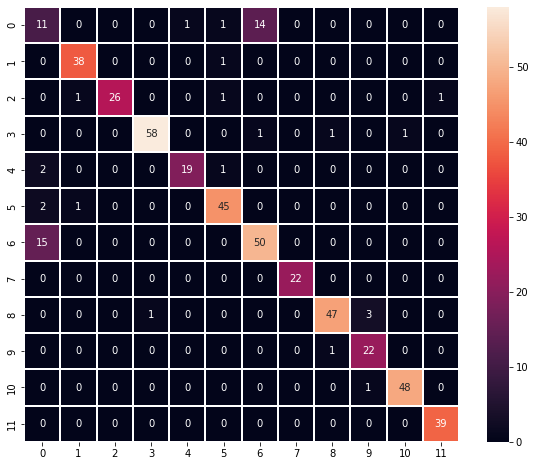

In [ ]:
y_pred_arg_4=np.argmax(y_test_pred_4,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_4)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Key observations model 4

- We got the following accuracy:
  - Training data: 0.9645 
  - Validation data: 0.8947
  - Testing data: 0.8947
- We can conclude that we are not overfitting
- The accuracy has improved significantly
- We can see almost none high numbers out of the diagonal in the confusion matrix, indicating that we are  predicting correctly


# Model Comparison and selection

In [ ]:
model_comparison_test 

,Model,Accuracy,Recall,Precision,F1
0,Model 1 - TEST,0.652632,0.652632,0.639542,0.609830
0,Model 2 - TEST,0.696842,0.696842,0.663622,0.666349
0,Model 3 - TEST,0.433684,0.433684,0.315506,0.314175
0,Model 4 - TEST,0.894737,0.894737,0.899585,0.896558


In the above table we caan see and compare how our 4 models behave infront of unseen data.

As we can see the worst model is Model 3 (VGG16) with an accuracy, recall below 45% and precision and F1 scores below 45% 

Model 1 and Model 2 are not performing as we would want since all they scores (Accuracy, Precision, Recall and F1) are between 61 - 65% for Model 1 and between 66 - 70% for Model 2

The **Model 4** , transfer learning from **MobileNet** is by far the best model we have found. Its performance on unseen data is very good and all its metrics are performing very good.

## Conclusions

Doing a simple actions can improve the results of the Model 1, just doing some data augmentation and adding a Batch Normalization Layer resulted in a most efficient model.

An important note is that utilizing transfer learning will not always improve the results, as we have seen in Model 3 utilizing VGG16, setting its layers to non trainable has not given a good performance. That can be atributed to the fact that the training images of VGG16 are not quite similar to our dataset so, its weights are not a good fit to our project.

As a final conclusion we can say that building a non sequential model with a deep architecture using a combination of Depthwise Conv Layers with batch normalization and decreasing gradualy the size of the filters has given the best performance. Using MobileNet architecture (but not its weights) has resulted in a very good model.



# Convert ipynb to HTML

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Project_8_Computer_Vision_Plant_Seedlings_Classification_EMS.ipynb


[NbConvertApp] Converting notebook ///content/Project_8_Computer_Vision_Plant_Seedlings_Classification_EMS.ipynb to html
[NbConvertApp] Writing 5722444 bytes to /content/Project_8_Computer_Vision_Plant_Seedlings_Classification_EMS.html
